In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
import pandas as pd

## 입력값, 출력값 정리

In [3]:
train_csv = pd.read_csv('data/20142018_whole.csv')
train_csv = train_csv[['일시','풍속(m/s)', '풍향(deg)', '파향(deg)', '유의파고(m)']]
train_csv = train_csv.dropna()

In [4]:
test_csv = pd.read_csv('data/2019_whole.csv')
test_csv = test_csv[['일시','풍속(m/s)', '풍향(deg)', '파향(deg)', '유의파고(m)']]
test_csv = test_csv.dropna()

In [5]:
train_data = train_csv[['풍속(m/s)', '풍향(deg)', '파향(deg)']]
train_data = train_data.values

In [6]:
test_data = test_csv[['풍속(m/s)', '풍향(deg)', '파향(deg)']]
test_data = test_data.values

In [7]:
train_targets = train_csv[['유의파고(m)']]
train_targets = train_targets.values

In [8]:
test_targets = test_csv[['유의파고(m)']]
test_targets = test_targets.values

In [9]:
train_data.shape

(42311, 3)

## 데이터 정규화

In [10]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 모델 구성

In [11]:
from keras import models
from keras import layers
from keras import losses

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='logcosh', metrics=['mae'])
    return model

## 모델 훈련

In [12]:
# 케라스 모델 구성(컴파일 포함)
model = build_model()
num_epochs = 200
# 모델 훈련
history = model.fit(train_data, train_targets, epochs = num_epochs)

Epoch 1/200
42311/42311 [==============================] - 7s 175us/step - loss: 0.0990 - mean_absolute_error: 0.3345
Epoch 2/200
42311/42311 [==============================] - 7s 160us/step - loss: 0.0685 - mean_absolute_error: 0.2819
Epoch 3/200
42311/42311 [==============================] - 7s 171us/step - loss: 0.0668 - mean_absolute_error: 0.2779
Epoch 4/200
42311/42311 [==============================] - 8s 187us/step - loss: 0.0656 - mean_absolute_error: 0.2751
Epoch 5/200
42311/42311 [==============================] - 7s 172us/step - loss: 0.0650 - mean_absolute_error: 0.2736
Epoch 6/200
42311/42311 [==============================] - 8s 187us/step - loss: 0.0645 - mean_absolute_error: 0.2722
Epoch 7/200
42311/42311 [==============================] - 8s 184us/step - loss: 0.0641 - mean_absolute_error: 0.2709
Epoch 8/200
42311/42311 [==============================] - 8s 186us/step - loss: 0.0637 - mean_absolute_error: 0.2701
Epoch 9/200
42311/42311 [==============================]

42311/42311 [==============================] - 4s 103us/step - loss: 0.0611 - mean_absolute_error: 0.2634
Epoch 70/200
42311/42311 [==============================] - 5s 114us/step - loss: 0.0611 - mean_absolute_error: 0.2634
Epoch 71/200
42311/42311 [==============================] - 5s 126us/step - loss: 0.0610 - mean_absolute_error: 0.2632
Epoch 72/200
42311/42311 [==============================] - 5s 108us/step - loss: 0.0611 - mean_absolute_error: 0.2632
Epoch 73/200
42311/42311 [==============================] - 5s 114us/step - loss: 0.0611 - mean_absolute_error: 0.2634
Epoch 74/200
42311/42311 [==============================] - 5s 125us/step - loss: 0.0610 - mean_absolute_error: 0.2634
Epoch 75/200
42311/42311 [==============================] - 5s 124us/step - loss: 0.0610 - mean_absolute_error: 0.2631
Epoch 76/200
42311/42311 [==============================] - 5s 113us/step - loss: 0.0610 - mean_absolute_error: 0.2632
Epoch 77/200
42311/42311 [==============================] - 5

42311/42311 [==============================] - 6s 142us/step - loss: 0.0610 - mean_absolute_error: 0.2631
Epoch 138/200
42311/42311 [==============================] - 7s 173us/step - loss: 0.0610 - mean_absolute_error: 0.2632
Epoch 139/200
42311/42311 [==============================] - 8s 185us/step - loss: 0.0610 - mean_absolute_error: 0.2632
Epoch 140/200
42311/42311 [==============================] - 7s 155us/step - loss: 0.0609 - mean_absolute_error: 0.2632
Epoch 141/200
42311/42311 [==============================] - 7s 171us/step - loss: 0.0609 - mean_absolute_error: 0.2630
Epoch 142/200
42311/42311 [==============================] - 7s 175us/step - loss: 0.0610 - mean_absolute_error: 0.2631
Epoch 143/200
42311/42311 [==============================] - 7s 168us/step - loss: 0.0610 - mean_absolute_error: 0.2633
Epoch 144/200
42311/42311 [==============================] - 7s 176us/step - loss: 0.0609 - mean_absolute_error: 0.2632
Epoch 145/200
42311/42311 [===========================

## 테스트

In [13]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

8494/8494 [==============================] - 1s 73us/step


In [14]:
test_mae_score

0.26491352555778186

## 계측값과 예측값의 비교

In [15]:
predict_targets = model.predict(test_data)

In [16]:
import matplotlib.pyplot as plt

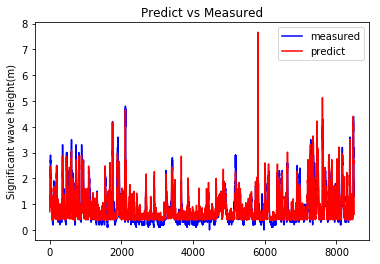

In [17]:
plt.plot(test_targets, 'b',label='measured')
plt.plot(predict_targets,'r',label='predict')
plt.title('Predict vs Measured')
plt.ylabel('Significant wave height(m)')
plt.legend()

plt.show()

In [18]:
import numpy as np

In [19]:
predict_targets = predict_targets.flatten()
test_targets = test_targets.flatten()

In [20]:
np.savetxt('sigwave.txt',(test_targets,predict_targets))

In [21]:
result_csv = test_csv

In [22]:
result_csv['유의파고예측(m)'] = predict_targets

In [23]:
result_csv.to_csv('result/2019_result_sigwave.csv',encoding='utf-8-sig')

In [24]:
history.history['loss']

[0.09897479139604204,
 0.06846948612252174,
 0.06678266529035139,
 0.06558982969169104,
 0.0649766222973565,
 0.06451332883902346,
 0.06413096292473537,
 0.06370169507007534,
 0.0634551809035369,
 0.06322880362822539,
 0.06301634360278865,
 0.06282806316330014,
 0.06271489983894839,
 0.062499545362881305,
 0.062393265844901576,
 0.06240323270347481,
 0.06222114791397063,
 0.06207507999878414,
 0.06202652359230804,
 0.06195684755006398,
 0.06187940260442028,
 0.061889153851659245,
 0.0617759267734997,
 0.06172118808044296,
 0.061653060641578473,
 0.06153044402460223,
 0.06145879949797051,
 0.061401736113446605,
 0.06134004969816244,
 0.06135417344961871,
 0.06128051005085859,
 0.061268177404555986,
 0.061258855527861825,
 0.061243882591326966,
 0.0612267492253743,
 0.06118540049086311,
 0.06119216586536473,
 0.06125604338104533,
 0.06118595568712463,
 0.06121953506437298,
 0.06114175836794153,
 0.06117761353453991,
 0.06117329316470864,
 0.06120174669023553,
 0.06119250408784395,
 0.061